In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Strong scaling
Strong scaling is defined as how the solution time varies with the number of processors for a fixed total problem size.

The data we use here is for a constant model.

In [4]:
# Define longitudes so we can define n_cores that this is divisible by
small_longitude = 360
medium_longitude = 3600
large_longitude = 7200

# Get n_cores
n_cores = np.array([1,2,4,8,15,20,30,40,60])

# Check that longitude is always divisible by this:
print(f'Small Model: {small_longitude/n_cores}')
print(f'Medium Model: {medium_longitude/n_cores}')
print(f'Large Model: {large_longitude/n_cores}')

Small Model: [360. 180.  90.  45.  24.  18.  12.   9.   6.]
Medium Model: [3600. 1800.  900.  450.  240.  180.  120.   90.   60.]
Large Model: [7200. 3600. 1800.  900.  480.  360.  240.  180.  120.]


This look good, there are no decimal numbers. wup wup.

In [22]:
# Chose a large enough number of iterations (constant for each model used)
n_iterations_small = 50000 #10000 before
n_iterations_medium = 1000
n_iterations_large = 200 #100 before

# Define elapsed time for the sequential code (I/O removed)
elapsed_time_seq_small = 10.747
elapsed_time_seq_medium = 241.842
elapsed_time_seq_large = 85.4707

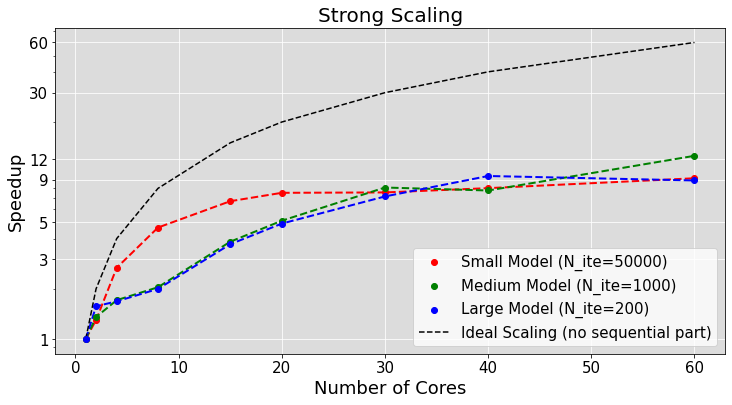

In [46]:
# Elapsed time with 50000, 1000, and 200
elapsed_time_small = np.array([51.4988, 39.6479, 19.2648, 11.0562, 7.68412, 6.844, 6.8073, 6.41596, 5.59763])

elapsed_time_medium = np.array([131.967, 97.4766, 77.2058, 64.5892, 34.4557, 25.7788, 16.3007, 16.984, 10.5215])


elapsed_time_large = np.array([101.671, 64.7041, 60.4798, 50.9469, 27.4864, 20.6656, 14.2032, 10.7113, 11.3929])  

# Plotting
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(n_cores, elapsed_time_small[0]/elapsed_time_small, color='r', linestyle='dashed',linewidth=2,zorder=2)
ax.scatter(n_cores, elapsed_time_small[0]/elapsed_time_small, color='r',zorder=3, label='Small Model (N_ite=50000)')

ax.plot(n_cores, elapsed_time_medium[0]/elapsed_time_medium, color='g', linestyle='dashed',linewidth=2,zorder=2)
ax.scatter(n_cores, elapsed_time_medium[0]/elapsed_time_medium, color='g',zorder=3, label='Medium Model (N_ite=1000)')

ax.plot(n_cores, elapsed_time_large[0]/elapsed_time_large, color='b', linestyle='dashed',linewidth=2,zorder=2)
ax.scatter(n_cores, elapsed_time_large[0]/elapsed_time_large, color='b',zorder=3, label='Large Model (N_ite=200)')

ax.plot(n_cores, n_cores, color='k', linestyle='dashed', label='Ideal Scaling (no sequential part)')
ax.set_yscale('log')
ax.set_yticks([1, 3, 5, 9, 12, 30, 60], labels=['1','3','5','9','12','30','60'])

ax.set_facecolor('gainsboro')
ax.grid(color='white')

ax.set_ylabel('Speedup', fontsize=18)
ax.set_xlabel('Number of Cores', fontsize=18)
ax.set_title('Strong Scaling', fontsize=20)
ax.legend(prop={'size':15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()